# Chapter 5: Acoustic Wave Propagation

The acoustic wave equation governs the propagation of pressure waves. Wave types that obey this law tend to travel in liquids or gases where shear waves or longitudinal style wave motion is not possible. An obvious example is sound waves.

The acoustic wave equation is defined as:

\begin{equation}
  \nabla ^2 p - \frac{1}{c^2} \frac{\partial ^2 p}{\partial t^2} = 0
  \tag{5.1}
\end{equation}

where $p$ is the pressure, $t$ is the time and $c$ is the wave velocity. In this chapter the acoustic wave equation is demonstrated. Important steps include the translation of the Laplacian $\nabla^2$ to the *escript* general form, the stiff equation stability criterion and solving for the displacement or acceleration solution.

## 5.1 The Laplacian in *escript*

The Laplacian operator which can be written as $\Delta$ or $\nabla^2$,  is calculated via the divergence of the gradient of the object, which in this example is the scalar $p$. Thus we can write:

\begin{equation}
  \nabla^2 p = \nabla \cdot \nabla p = \sum_{i}^n \frac{\partial^2 p}{\partial x^2_{i}}
  \tag{5.2}
\end{equation}

For the two dimensional case in Cartesian coordinates Equation (5.2) becomes:

\begin{equation}
  \nabla^2 p = \frac{\partial^2 p}{\partial x^2} + \frac{\partial^2 p}{\partial y^2}
  \tag{5.3}
\end{equation}

In *escript* the Laplacian is calculated using the divergence representation and the intrinsic functions *grad()* and *trace()*. The function *grad{}* will return the spatial gradients of an object. For a rank 0 solution, this is of the form:

\begin{equation}
  \nabla p = \left[
	   \frac{\partial p}{\partial x _{0}},  
	   \frac{\partial p}{\partial x _{1}}
             \right]
\tag{5.4}
\end{equation}

Larger ranked solution objects will return gradient tensors. For example, a pressure field which acts in the directions $p _{0}$ and $p_{1}$ would return:

\begin{equation}
  \nabla p = \begin{bmatrix}
	   \frac{\partial p _{0}}{\partial x _{0}} &
	   \frac{\partial p _{1}}{\partial x _{0}} \\
	   \frac{\partial p _{0}}{\partial x _{1}} &
	   \frac{\partial p _{1}}{\partial x _{1}} 
             \end{bmatrix}
\tag{5.5}
\end{equation}

Equation (5.4) corresponds to the Linear PDE general form value $X$. Notice however, that the general form contains the term $X_{i,j}$ (the first derivative in the $j^{th}$ direction for the $i^{th}$ component of the solution), hence for a rank 0 object there is no need to do more then calculate the gradient and submit it to the solver. In the case of the rank 1 or greater object, it is also necessary to calculate the trace. This is the sum of the diagonal in Equation (5.5).

Thus when solving for equations containing the Laplacian one of two things must be completed. If the object `p` is less than rank 1 the gradient is calculated via:

```python
  gradient=grad(p)
```

and if the object is greater then or equal to a rank 1 tensor, the trace of the gradient is calculated.

```python
 gradient=trace(grad(p))
```

These values can then be submitted to the PDE solver via the general form term $X$. The Laplacian is then computed in the solution process by taking the divergence of $X$.

Note, if you are unsure about the rank of your tensor, the *getRank* command will return the rank of the PDE object.

```python
 rank = p.getRank()
```

## 5.2 Numerical Solution Stability

Unfortunately, the wave equation belongs to a class of equations called **stiff** PDEs. These types of equations can be difficult to solve numerically as they tend to oscillate about the exact solution, which can eventually lead to a catastrophic failure. To counter this problem, explicitly stable schemes like the backwards Euler method, and correct parameterisation of the problem are required. 

There are two variables which must be considered for stability when numerically trying to solve the wave equation. For linear media, the two variables are related via:

\begin{equation}
  f=\frac{v}{\lambda}
  \tag{5.6}
\end{equation}

The velocity $v$ that a wave travels in a medium is an important variable. For stability the analytical wave must not propagate faster than the numerical wave is able to, and in general, needs to be much slower than the numerical wave. For example, a line 100m long is discretised into 1m intervals or 101 nodes. If a wave enters with a propagation velocity of 100m/s then the travel time for the wave between each node will be 0.01 seconds. The time step, must therefore be significantly less than this. Of the order $10E-4$ would be appropriate. This stability criterion is known as the Courant-Friedrichs-Lewy condition given by

\begin{equation}
  dt=f\cdot \frac{dx}{v}
  \tag{5.7}
\end{equation}

where $dx$ is the mesh size and $f$ is a safety factor. To obtain a time step of $10E-4$, a safety factor of $f=0.1$ was used.

The wave frequency content also plays a part in numerical stability. The Nyquist-sampling theorem states that a signals bandwidth content will be accurately represented when an equispaced sampling rate $f _{n}$ is equal to or greater than twice the maximum frequency of the signal $f_{s}$, or:

\begin{equation}
  f_{n} \geqslant f_{s}
  \tag{5.8}
\end{equation}

For example, a 50Hz signal will require a sampling rate greater than 100Hz or one sample every 0.01 seconds. The wave equation relies on a spatial frequency, thus the sampling theorem in this case applies to the solution mesh spacing. This relationship confirms that the frequency content of the input signal directly affects the time discretisation of the problem.

To accurately model the wave equation with high resolutions and velocities means that very fine spatial and time discretisation is necessary for most problems. This requirement makes the wave equation arduous to solve numerically due to the large number of time iterations required in each solution. Models with very high velocities and frequencies will be the worst affected by this problem.

## 5.3 Displacement Solution

**The scripts referenced in this section are: example07a.py**

We begin the solution to this PDE with the centred difference formula for the second derivative:

\begin{equation}
  f''(x) \approx \frac{f(x+h - 2f(x) + f(x-h)}{h^2}
  \tag{5.9}
\end{equation}

substituting Equation (5.9) for $\frac{\partial ^2 p }{\partial t ^2}$ in Equation (5.1):

\begin{equation}
  \nabla ^2 p - \frac{1}{c^2h^2} \left[p_{(t+1)} - 2p_{(t)} + p_{(t-1)} \right] = 0
  \tag{5.10}
\end{equation}

Rearranging for $p_{(t+1)}$:

\begin{equation}
  p_{(t+1)} = c^2 h^2 \nabla ^2 p_{(t)} +2p_{(t)} - p_{(t-1)}
  \tag{5.11}
\end{equation}

this can be compared with the general form of the `esys.escript.LinearPDEs` module and it becomes clear that

$D=1$, $X_{i,j}=-c^2 h^2 \nabla ^2 p_{(t)}$ and $Y=2p_{(t)} - p_{(t-1)}$.

The solution script is similar to others that we have created in previous chapters. The general steps are:

 1. The necessary libraries must be imported.
 2. The domain needs to be defined.
 3. The time iteration and control parameters need to be defined.
 4. The PDE is initialised with source and boundary conditions.
 5. The time loop is started and the PDE is solved at consecutive time steps.
 6. All or select solutions are saved to file for visualisation later on.

Parts of the script which warrant more attention are the definition of the source, visualising the source, the solution time loop and the VTK data export.

### 5.3.1 Pressure Sources

As the pressure is a scalar, one need only define the pressure for two time steps prior to the start of the solution loop. Two known solutions are required because the wave equation contains a double partial derivative with respect to time. This is often a good opportunity to introduce a source to the solution. This model has the source located at it's centre. The source should be smooth and cover a number of samples to satisfy the frequency stability criterion. Small sources will generate high frequency signals. Here, when using a rectangular domain, the source is defined by a cosine function:

In [1]:
from esys.escript import *
from esys.finley import Rectangle

#Geometric and material property related variables.
mx = 1000. # model lenght
my = 1000. # model width
ndx = 500 # steps in x direction 
ndy = 500 # steps in y direction
xstep=mx/ndx # calculate the size of delta x
ystep=my/ndy # calculate the size of delta y

mydomain=Rectangle(l0=mx,l1=my,n0=ndx, n1=ndy) # create the domain
x=mydomain.getX() # get the node locations of the domain

U0=0.005 # amplitude of point source
xc=[500,500] #location of point source
# define small radius around point xc
src_radius = 25.
# for first two time steps
u=U0*(cos(length(x-xc)*3.1415/src_radius)+1.)*whereNegative(length(x-xc)-src_radius)
print(u)
u_m1=u

Summary: inf=0 sup=0.01 data points=251001


### 5.3.2 Visualising the Source


There are two options for visualising the source. The first is to export the initial conditions of the model to VTK, which can be interpreted as a scalar surface in *mayavi2*. The second is to take a cross section of the model which will require the *Locator* function. Firstly `Locator` must be imported:

In [2]:
from esys.escript.pdetools import Locator

The function can then be used on the domain to locate the nearest domain node to the point or points of interest. It is now necessary to build a list of $(x,y)$ locations that specify where are model slice will go. This is easily implemented with a loop:

In [3]:
cut_loc=[]
src_cut=[]
for i in range(ndx//2-ndx//10,ndx//2+ndx//10):
    cut_loc.append(xstep*i)
    src_cut.append([xstep*i,xc[1]])

We then submit the output to `Locator` and finally return the appropriate values using the `getValue` function:

In [4]:
src=Locator(mydomain,src_cut)
src_cut=src.getValue(u)

It is then a trivial task to plot and save the output using `matplotlib`:

<IPython.core.display.Javascript object>


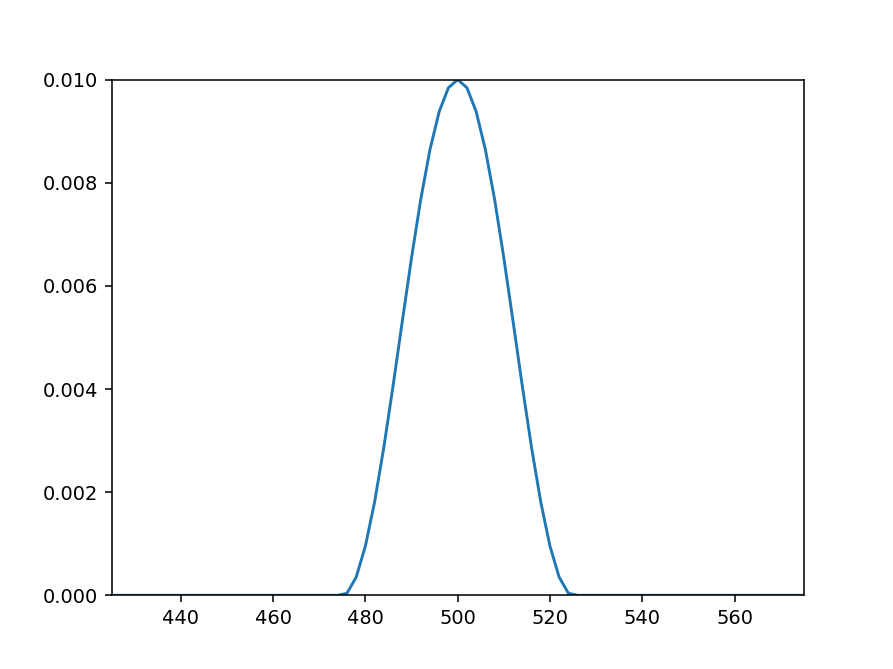

In [18]:
# makes an interactive plotting window
%matplotlib notebook

import pylab as pl
import os

# where to save output data
savepath = "data/example07a"
mkDir(savepath)

pl.plot(cut_loc,src_cut)
pl.axis([xc[0]-src_radius*3,xc[0]+src_radius*3,0.,2*U0])
pl.savefig(os.path.join(savepath,"source_line.png"))

### 5.3.3 Solution of displacement

To solve for displacement over time, firstly we need to define some time related variables:

In [6]:
from esys.escript.unitsSI import *

c=380.0*m/sec  # velocity of sound in air
csq=c*c #square of c

tend=0.5    # end time
h=0.0005    # time step
rtime=0.0 # first time to record
rtime_inc=tend/20.0 # time increment to record
#Check to make sure number of time steps is not too large.
print("Time step size= ",h, " Expected time steps= ",tend/h, " Expected outputs=", tend/rtime_inc)

Time step size=  0.0005  Expected time steps=  1000.0  Expected outputs= 20.0


Then we set up the PDE:

In [7]:
from esys.escript.linearPDEs import LinearPDE
mypde=LinearPDE(mydomain) # create pde
mypde.setSymmetryOn() # turn symmetry on
mypde.setValue(D=1.) # set the value of D in the general form to 1.

Finally the time loop is started and the PDE is solved at consecutive time steps. Also, select solutions are saved to file for visualisation. Be patient as the run will take some time due to tiny time steps.

In [8]:
from esys.weipa import saveVTK
import time

n=0 # iteration counter
t=0 # time counter

start_time = time.time()
while t<tend:
    g=grad(u); pres=csq*h*h*g # get current pressure
    mypde.setValue(X=-pres,Y=(2.*u-u_m1)) # set values in pde
    u_p1 = mypde.getSolution() # get the new displacement
    u_m1=u; u=u_p1 # shift values back one time step for next iteration
    # save current displacement, acceleration and pressure
    if (t >= rtime):
        saveVTK(os.path.join(savepath,"ex07a.%i.vtu"%n),displacement=length(u),tensor=pres)
        rtime=rtime+rtime_inc #increment data save time
    # increment loop values
    t=t+h; n=n+1
    print("time step %d, t=%s"%(n,t))

end_time = time.time()
dis_time = end_time - start_time
print("Simulation completed! Time taken: %s seconds." % dis_time)

time step 1, t=0.0005
time step 2, t=0.001
time step 3, t=0.0015
time step 4, t=0.002
time step 5, t=0.0025
time step 6, t=0.003
time step 7, t=0.0035
time step 8, t=0.004
time step 9, t=0.0045000000000000005
time step 10, t=0.005000000000000001
time step 11, t=0.005500000000000001
time step 12, t=0.006000000000000002
time step 13, t=0.006500000000000002
time step 14, t=0.007000000000000003
time step 15, t=0.007500000000000003
time step 16, t=0.008000000000000004
time step 17, t=0.008500000000000004
time step 18, t=0.009000000000000005
time step 19, t=0.009500000000000005
time step 20, t=0.010000000000000005
time step 21, t=0.010500000000000006
time step 22, t=0.011000000000000006
time step 23, t=0.011500000000000007
time step 24, t=0.012000000000000007
time step 25, t=0.012500000000000008
time step 26, t=0.013000000000000008
time step 27, t=0.013500000000000009
time step 28, t=0.014000000000000009
time step 29, t=0.01450000000000001
time step 30, t=0.01500000000000001
time step 31, t=

time step 227, t=0.11350000000000009
time step 228, t=0.11400000000000009
time step 229, t=0.11450000000000009
time step 230, t=0.11500000000000009
time step 231, t=0.11550000000000009
time step 232, t=0.11600000000000009
time step 233, t=0.11650000000000009
time step 234, t=0.11700000000000009
time step 235, t=0.11750000000000009
time step 236, t=0.11800000000000009
time step 237, t=0.11850000000000009
time step 238, t=0.11900000000000009
time step 239, t=0.11950000000000009
time step 240, t=0.12000000000000009
time step 241, t=0.1205000000000001
time step 242, t=0.1210000000000001
time step 243, t=0.1215000000000001
time step 244, t=0.1220000000000001
time step 245, t=0.1225000000000001
time step 246, t=0.1230000000000001
time step 247, t=0.1235000000000001
time step 248, t=0.1240000000000001
time step 249, t=0.1245000000000001
time step 250, t=0.12500000000000008
time step 251, t=0.12550000000000008
time step 252, t=0.12600000000000008
time step 253, t=0.12650000000000008
time step 

time step 451, t=0.22550000000000017
time step 452, t=0.22600000000000017
time step 453, t=0.22650000000000017
time step 454, t=0.22700000000000017
time step 455, t=0.22750000000000017
time step 456, t=0.22800000000000017
time step 457, t=0.22850000000000018
time step 458, t=0.22900000000000018
time step 459, t=0.22950000000000018
time step 460, t=0.23000000000000018
time step 461, t=0.23050000000000018
time step 462, t=0.23100000000000018
time step 463, t=0.23150000000000018
time step 464, t=0.23200000000000018
time step 465, t=0.23250000000000018
time step 466, t=0.23300000000000018
time step 467, t=0.23350000000000018
time step 468, t=0.23400000000000018
time step 469, t=0.23450000000000018
time step 470, t=0.23500000000000018
time step 471, t=0.23550000000000018
time step 472, t=0.23600000000000018
time step 473, t=0.23650000000000018
time step 474, t=0.23700000000000018
time step 475, t=0.23750000000000018
time step 476, t=0.23800000000000018
time step 477, t=0.23850000000000018
t

time step 677, t=0.33850000000000025
time step 678, t=0.33900000000000025
time step 679, t=0.33950000000000025
time step 680, t=0.34000000000000025
time step 681, t=0.34050000000000025
time step 682, t=0.34100000000000025
time step 683, t=0.34150000000000025
time step 684, t=0.34200000000000025
time step 685, t=0.34250000000000025
time step 686, t=0.34300000000000025
time step 687, t=0.34350000000000025
time step 688, t=0.34400000000000025
time step 689, t=0.34450000000000025
time step 690, t=0.34500000000000025
time step 691, t=0.34550000000000025
time step 692, t=0.34600000000000025
time step 693, t=0.34650000000000025
time step 694, t=0.34700000000000025
time step 695, t=0.34750000000000025
time step 696, t=0.34800000000000025
time step 697, t=0.34850000000000025
time step 698, t=0.34900000000000025
time step 699, t=0.34950000000000025
time step 700, t=0.35000000000000026
time step 701, t=0.35050000000000026
time step 702, t=0.35100000000000026
time step 703, t=0.35150000000000026
t

time step 904, t=0.45200000000000035
time step 905, t=0.45250000000000035
time step 906, t=0.45300000000000035
time step 907, t=0.45350000000000035
time step 908, t=0.45400000000000035
time step 909, t=0.45450000000000035
time step 910, t=0.45500000000000035
time step 911, t=0.45550000000000035
time step 912, t=0.45600000000000035
time step 913, t=0.45650000000000035
time step 914, t=0.45700000000000035
time step 915, t=0.45750000000000035
time step 916, t=0.45800000000000035
time step 917, t=0.45850000000000035
time step 918, t=0.45900000000000035
time step 919, t=0.45950000000000035
time step 920, t=0.46000000000000035
time step 921, t=0.46050000000000035
time step 922, t=0.46100000000000035
time step 923, t=0.46150000000000035
time step 924, t=0.46200000000000035
time step 925, t=0.46250000000000036
time step 926, t=0.46300000000000036
time step 927, t=0.46350000000000036
time step 928, t=0.46400000000000036
time step 929, t=0.46450000000000036
time step 930, t=0.46500000000000036
t

Check the results via the saved vtu files, and they should look like Figure (5.1):

<br>
 <figure>
  <img src="figures/ex07displacement.png" width="600">
  <figcaption>
    <center>
      Figure 5.1: Example 7: Displacement over time.
    </center>
  </figcaption>
 </figure>
<br>

## 5.4 Acceleration Solution

**The scripts referenced in this section are: example07b.py**

An alternative method to the displacement solution, is to solve for the acceleration $\frac{\partial ^2 p}{\partial t^2}$ directly. The displacement can then be derived from the acceleration after a solution has been calculated. The acceleration is given by a modified form of Equation (5.10):

\begin{equation}
  \nabla ^2 p - \frac{1}{c^2} a = 0
  \tag{5.12}
\end{equation}

and can be solved directly with $Y=0$ and $X=-c^2 \nabla ^2 p_{(t)}$. After each iteration the displacement is re-evaluated via:

\begin{equation}
  p_{(t+1)}=2p_{(t)} - p_{(t-1)} + h^2a
  \tag{5.13}  
\end{equation}

### 5.4.1 Lumping

For *escript*, the acceleration solution is preferred as it allows the use of matrix lumping. Lumping or mass lumping as it is sometimes known, is the process of aggressively approximating the density elements of a mass matrix into the main diagonal. The use of Lumping is motivated by the simplicity of diagonal matrix inversion. As a result, Lumping can significantly reduce the computational requirements of a problem. Care should be taken however, as this function can only be used when the $A$, $B$ and $C$ coefficients of the general form are zero. 

More information about the lumping implementation used in \esc and its accuracy can be found in the user guide.

To turn lumping on in *escript* one can use the command:

In [9]:
mypde.getSolverOptions().setSolverMethod(SolverOptions.HRZ_LUMPING)

It is also possible to check if lumping is set using:

In [10]:
print(mypde.isUsingLumping())

True


### 5.4.2 Point Monitoring

In the more general case where the solution mesh is irregular or specific locations need to be monitored, it is simple enough to use the *Locator* function: 

In [11]:
rec=Locator(mydomain,[250.,250.])

When the solution `u`  is updated we can extract the value at that point via:

In [12]:
u_rec=rec.getValue(u)

For consecutive time steps one can record the values from `u_rec` in an array:

In [13]:
u_rec0=[] # array to hold values
u_rec0.append(u_rec) #get the first two time steps

### 5.4.3 Solution of acceleration

With all the new features explained and setup, we can now solve for the acceleration and displacement:

In [14]:
# where to save output data
savepath = "data/example07b"
mkDir(savepath) #make sure savepath exists

# reset u to initial values
u=U0*(cos(length(x-xc)*3.1415/src_radius)+1)*whereNegative(length(x-xc)-src_radius)
u_m1=u

# reset timing
rtime=0.0 # first time to record
n=0 # iteration counter
t=0 # time counter

# re-setup PDE
mypde=LinearPDE(mydomain) # create pde
# turn lumping on for more efficient solving
mypde.getSolverOptions().setSolverMethod(SolverOptions.HRZ_LUMPING)
mypde.setSymmetryOn() # turn symmetry on
mypde.setValue(D=1.) # set the value of D in the general form to 1.

start_time = time.time()
while t<tend:
    g=grad(u); pres=csq*g # get current pressure
    mypde.setValue(X=-pres) # set values in pde
    accel = mypde.getSolution() # get new acceleration
    u_p1=(2.*u-u_m1)+h*h*accel # calculate the displacement for the next time step
    u_m1=u; u=u_p1 # shift values back one time step for next iteration
    # save current displacement, acceleration and pressure
    if (t >= rtime):
        saveVTK(os.path.join(savepath,"ex07b.%i.vtu"%n),displacement=length(u),\
                             acceleration=length(accel),tensor=pres)
        rtime=rtime+rtime_inc #increment data save time
    u_rec0.append(rec.getValue(u)) #location specific recording
    # increment loop values
    t=t+h; n=n+1
    print("time step %d, t=%s"%(n,t))

# save location specific recording to file
pl.savetxt(os.path.join(savepath,'u_rec.asc'),u_rec0)

end_time = time.time()
acc_time = end_time - start_time
print("Simulation completed! Time taken: %s seconds." % acc_time)

time step 1, t=0.0005
time step 2, t=0.001
time step 3, t=0.0015
time step 4, t=0.002
time step 5, t=0.0025
time step 6, t=0.003
time step 7, t=0.0035
time step 8, t=0.004
time step 9, t=0.0045000000000000005
time step 10, t=0.005000000000000001
time step 11, t=0.005500000000000001
time step 12, t=0.006000000000000002
time step 13, t=0.006500000000000002
time step 14, t=0.007000000000000003
time step 15, t=0.007500000000000003
time step 16, t=0.008000000000000004
time step 17, t=0.008500000000000004
time step 18, t=0.009000000000000005
time step 19, t=0.009500000000000005
time step 20, t=0.010000000000000005
time step 21, t=0.010500000000000006
time step 22, t=0.011000000000000006
time step 23, t=0.011500000000000007
time step 24, t=0.012000000000000007
time step 25, t=0.012500000000000008
time step 26, t=0.013000000000000008
time step 27, t=0.013500000000000009
time step 28, t=0.014000000000000009
time step 29, t=0.01450000000000001
time step 30, t=0.01500000000000001
time step 31, t=

time step 227, t=0.11350000000000009
time step 228, t=0.11400000000000009
time step 229, t=0.11450000000000009
time step 230, t=0.11500000000000009
time step 231, t=0.11550000000000009
time step 232, t=0.11600000000000009
time step 233, t=0.11650000000000009
time step 234, t=0.11700000000000009
time step 235, t=0.11750000000000009
time step 236, t=0.11800000000000009
time step 237, t=0.11850000000000009
time step 238, t=0.11900000000000009
time step 239, t=0.11950000000000009
time step 240, t=0.12000000000000009
time step 241, t=0.1205000000000001
time step 242, t=0.1210000000000001
time step 243, t=0.1215000000000001
time step 244, t=0.1220000000000001
time step 245, t=0.1225000000000001
time step 246, t=0.1230000000000001
time step 247, t=0.1235000000000001
time step 248, t=0.1240000000000001
time step 249, t=0.1245000000000001
time step 250, t=0.12500000000000008
time step 251, t=0.12550000000000008
time step 252, t=0.12600000000000008
time step 253, t=0.12650000000000008
time step 

time step 451, t=0.22550000000000017
time step 452, t=0.22600000000000017
time step 453, t=0.22650000000000017
time step 454, t=0.22700000000000017
time step 455, t=0.22750000000000017
time step 456, t=0.22800000000000017
time step 457, t=0.22850000000000018
time step 458, t=0.22900000000000018
time step 459, t=0.22950000000000018
time step 460, t=0.23000000000000018
time step 461, t=0.23050000000000018
time step 462, t=0.23100000000000018
time step 463, t=0.23150000000000018
time step 464, t=0.23200000000000018
time step 465, t=0.23250000000000018
time step 466, t=0.23300000000000018
time step 467, t=0.23350000000000018
time step 468, t=0.23400000000000018
time step 469, t=0.23450000000000018
time step 470, t=0.23500000000000018
time step 471, t=0.23550000000000018
time step 472, t=0.23600000000000018
time step 473, t=0.23650000000000018
time step 474, t=0.23700000000000018
time step 475, t=0.23750000000000018
time step 476, t=0.23800000000000018
time step 477, t=0.23850000000000018
t

time step 677, t=0.33850000000000025
time step 678, t=0.33900000000000025
time step 679, t=0.33950000000000025
time step 680, t=0.34000000000000025
time step 681, t=0.34050000000000025
time step 682, t=0.34100000000000025
time step 683, t=0.34150000000000025
time step 684, t=0.34200000000000025
time step 685, t=0.34250000000000025
time step 686, t=0.34300000000000025
time step 687, t=0.34350000000000025
time step 688, t=0.34400000000000025
time step 689, t=0.34450000000000025
time step 690, t=0.34500000000000025
time step 691, t=0.34550000000000025
time step 692, t=0.34600000000000025
time step 693, t=0.34650000000000025
time step 694, t=0.34700000000000025
time step 695, t=0.34750000000000025
time step 696, t=0.34800000000000025
time step 697, t=0.34850000000000025
time step 698, t=0.34900000000000025
time step 699, t=0.34950000000000025
time step 700, t=0.35000000000000026
time step 701, t=0.35050000000000026
time step 702, t=0.35100000000000026
time step 703, t=0.35150000000000026
t

time step 906, t=0.45300000000000035
time step 907, t=0.45350000000000035
time step 908, t=0.45400000000000035
time step 909, t=0.45450000000000035
time step 910, t=0.45500000000000035
time step 911, t=0.45550000000000035
time step 912, t=0.45600000000000035
time step 913, t=0.45650000000000035
time step 914, t=0.45700000000000035
time step 915, t=0.45750000000000035
time step 916, t=0.45800000000000035
time step 917, t=0.45850000000000035
time step 918, t=0.45900000000000035
time step 919, t=0.45950000000000035
time step 920, t=0.46000000000000035
time step 921, t=0.46050000000000035
time step 922, t=0.46100000000000035
time step 923, t=0.46150000000000035
time step 924, t=0.46200000000000035
time step 925, t=0.46250000000000036
time step 926, t=0.46300000000000036
time step 927, t=0.46350000000000036
time step 928, t=0.46400000000000036
time step 929, t=0.46450000000000036
time step 930, t=0.46500000000000036
time step 931, t=0.46550000000000036
time step 932, t=0.46600000000000036
t

In [17]:
print("Execution time for displacement solution: %s seconds." % dis_time)
print("Execution time for acceleration solution with lumping: %s seconds." % acc_time)
print("Speedup = : %s" % (dis_time/acc_time))

Execution time for displacement solution: 154.88502764701843 seconds.
Execution time for acceleration solution with lumping: 95.0467517375946 seconds.
Speedup = : 1.629566763887161


As expected, according to the above recorded execution times, the acceleration solution indeed runs faster than the displacement solution because of the lumping.

## 5.5 Stability Investigation

It is now prudent to investigate the stability limitations of this problem. First, we let the frequency content of the source be very small. If we define the source as a cosine input, then the wavlength of the input is equal to the radius of the source. Let this value be 5 meters. Now, if the maximum velocity of the model is $c=380.0ms^{-1}$, then the source frequency is $f_{r} = \frac{380.0}{5} = 76.0 Hz$. This is a worst case scenario with a small source and the models maximum velocity. 

Furthermore, we know from Section 5.2, that the spatial sampling frequency must be at least twice this value to ensure stability. If we assume the model mesh is a square equispaced grid, then the sampling interval is the side length divided by the number of samples, given by $\Delta x = \frac{1000.0m}{400} = 2.5m$ and the maximum sampling frequency capable at this interval is $f_{s}=\frac{380.0ms^{-1}}{2.5m}=152Hz$ this is just equal to the
required rate satisfying Equation (5.8). 

Figure (5.2) depicts three examples where the grid has been undersampled, sampled correctly, and over sampled. The grids used had 200, 400 and 800 nodes per side respectively. Obviously, the oversampled grid retains the best resolution of the modelled wave.

<br>
 <figure>
  <img src="figures/ex07samp.png" width="800">
  <figcaption>
    <center>
      Figure 5.2: Sampling Theorem example for stability investigation.
    </center>
  </figcaption>
 </figure>
<br>

The time step required for each of these examples is simply calculated from the propagation requirement. For a maximum velocity of $380.0ms^{-1}$,

\begin{equation}
  \Delta t \leq \frac{1000.0m}{200} \frac{1}{380.0} = 0.013s
  \tag{5.14a}
\end{equation}

\begin{equation}
  \Delta t \leq \frac{1000.0m}{400} \frac{1}{380.0} = 0.0065s
  \tag{5.14b}  
\end{equation}

\begin{equation}
  \Delta t \leq \frac{1000.0m}{800} \frac{1}{380.0} = 0.0032s
  \tag{5.14c}  
\end{equation}

Observe that for each doubling of the number of nodes in the mesh, we halve the time step. If the source is placed at the center, it is $500m$ from the nearest boundary. With a velocity of $380.0ms^{-1}$, it will take $\approx1.3s$ for the wavefront to reach that boundary. In each case, this equates to $100$,  $200$ and $400$ time steps. This is again, only a best case scenario, for true stability these time values may need to be halved and possibly halved again.